# Problem Statement

* This dataset contains about 10 years of daily weather observations from many locations across Australia.

* A binary classification Problem

* Forecast Tomorrow will be rain or not

# Data Dictionary


* This dataset contains about 10 years of daily weather observations from many locations across Australia.

* A binary classification Problem

* Forecast Tomorrow will be rain or not
This dataset contains about 10 years of daily weather observations from many locations across Australia. Before any processing, we must first obtain information about the data we are going to use.

**Task to perform**

 predict the target variable Rain_Tomorrow
  the column which are the input are as follows:


*   DATE: the date if each day is provided to check the data is consistent, we can break date in day, month and year.
*   LOCATION: Albury, New castle, Richmode and other areas of Australia is covered
*   MIN TEMP: Min temperatura of each location is provided which helps to check the humidity of the environment
*   MAX TEMP: Max temperature is given to check the probablity of rain
*   RANFALL: Rainfall record is also given, there are som areas where 0.0 value is given so there were no rain happen about 10 years in that region.
*   EVAPORATION: Mostly the value of evaporation is NAN in different areas.
*   SUNSHNE: Sunshine value is mostly null in areas which the cloudy environment.
*   WIND GUST DIR: The direction od wind blowing is provided there.
*   WIND GUST SPEED: The speed of wind is also provided there.
*   WindDir9am : The direction of wind at specific time is there so the comparison b/w different times will help in analysis of Rain_Tomorrow.
*   WindDir3pm : Speed direction at 3pm
*   WindSpeed9am :  Within Australia, wind speeds are generally presented in kilometres per hour. Thats why different time stamp wind speed is given there.
*   WindSpeed3pm : As above, due to change of wind speed per hour, this will help to predict the target variable.
*   Humidity9am : The humidity ranges b/w 6 hours in Australia.
*   Humidity3pm : As above, 6 hours change is provided for analysis
*   Pressure9am : Pressure rate per 6 hours is given
*   Pressure3pm	: As it ranges or varies from 6 hours, the data will help to find accurate results.
*   Cloud9am : The weather changes about 6 hours
*   Cloud3pm : 6 hours gap in cloudy env data will helpful in prediction.
*   Temp9am	: Temperature varien from north to south
*   Temp3pm	: Temperature also varies fom 6 hours time stamp
*   RainToday	: Rain Today is helpful to predict either its going to rai tomorrow.
*   RainTomorrow : Rain Tomorrow is our target variable to predict the rain in Australia by using above given features.

# Importing Libraries

In [1]:
import numpy as np   # for numerical computation with n dimensional arrays
import pandas as pd # for data manipluation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for conditional plotting

# Loading Data

In [2]:
data = pd.read_csv('/content/weatherAUS.csv',)  #
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()  # for complete understanding about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.shape

(145460, 23)

### Information we get from the data
* 145460 rows
* 23 columns
* 7 columns we have object
* 16 columns we have float


# Data Preprocessing

In [5]:
data.describe()  # checking descripion

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
data.describe(include= "object",)  # checking description including object

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [7]:
data.isnull().sum()  #checking missing values

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Separation of Categorical (discrete) or Numerical (Contnious)

In [8]:
data['Location'].dtype

dtype('O')

In [9]:
# Checking Categorical Features in dataset and counting it

cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))


Number of Categorical Features we have in data is : 7  
Here is Listed features ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [10]:
# Checking Numerical Features in dataset and counting it

num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))


Number of Numerical Features we have in data is : 16  
Here is the Listed Numerical features ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


# Checking Cardanility

* number of unique vaues in cardinality could be
* if there are more unique values then it is hard to do label encoding
* also effect on the efficiency of the model

In [11]:
for i  in cat_features:
  count = len(data[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

# hence the unqiue value in  date column is very large, Thus
# Cardinality of Data is high which poses several problem to the model in terms of efficiency
# because we need to do numerical encoding or create dummies

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


## Handling Cardinatlity issue

In [12]:
data["Date"] = pd.to_datetime(data["Date"])   #Converting into Date
data["Year"] = data["Date"].dt.year           #abstracting year in different column
data["Month"] = data["Date"].dt.month         #abstracting month in diffrent column
data["Day"] = data["Date"].dt.day             #abstracting day in diffrent column

In [13]:
data.head()  # we can see the columns in the end

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [14]:
# Dropping Date Column

data.drop("Date", axis = 1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Handling Missing values

## For categorical Variables

In [15]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype =="O"]

In [16]:
categorical_features    # now we have the features othe than date

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [17]:
missing_cat = data[categorical_features].isnull().sum() # Total missing values
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


Text(0.5, 1.0, 'Missing values in Categorical Columns')

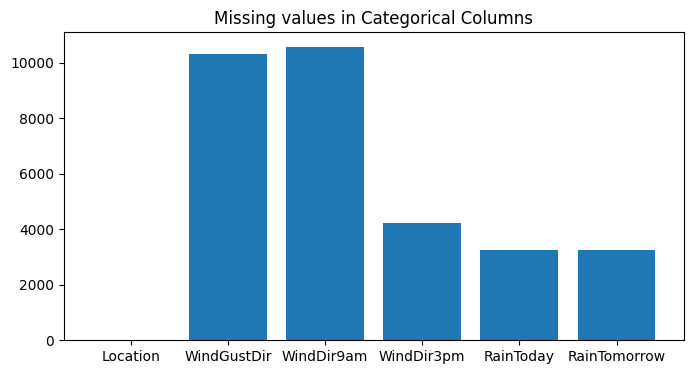

In [18]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # by visualization we can see that winDir3pm has large number of missing values
plt.title("Missing values in Categorical Columns")

## Handling Missing Values for Categorical

In [19]:
cat_features_with_null = [features for features in categorical_features if data[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
  data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])     #each cat_feature is filled by most repeated value

In [20]:
data[categorical_features].isnull().sum()  # here we can see ther is no missing values now

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

## For Continous Features

In [21]:
num_col = [num_col for num_col in data.columns if data[num_col].dtype !="O"]
#numerical features extraction from the data

In [22]:
missing_num = data[num_col].isnull().sum()    # counting missing values in each  num_feature
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

Text(0.5, 1.0, 'Missing Values in Numerical Columns')

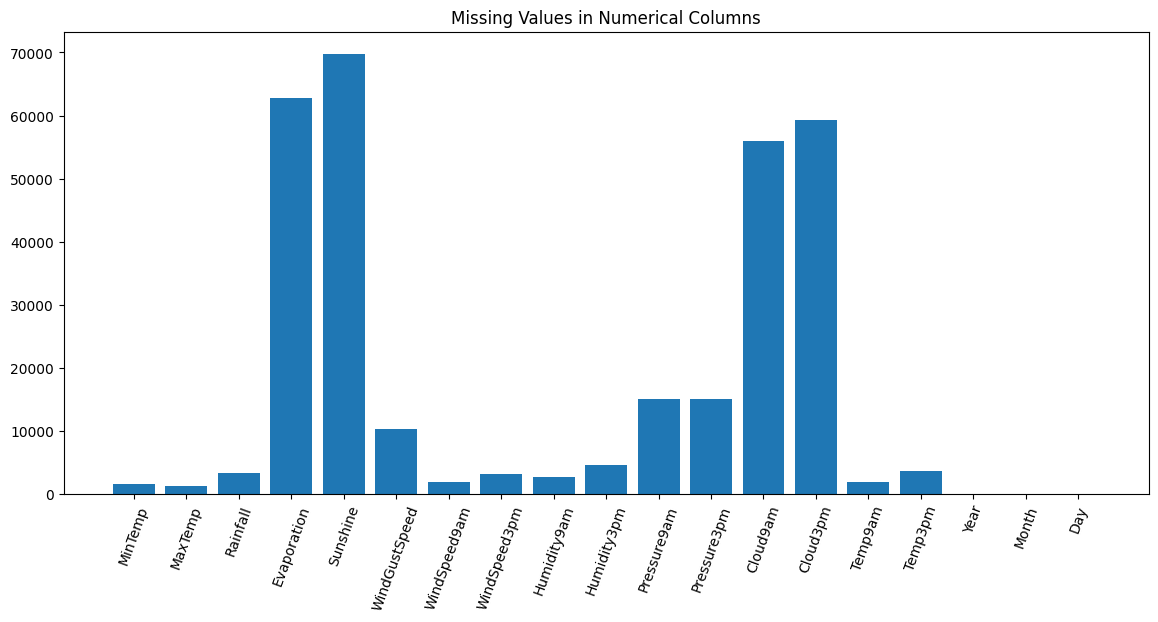

In [23]:
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values
plt.xticks(rotation=70)
plt.title("Missing Values in Numerical Columns")

In [24]:
num_col_with_null_values = [col for col in num_col if data[col].isnull().sum()]
missing_values = data[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

Text(0.5, 1.0, 'Checking Outliers')

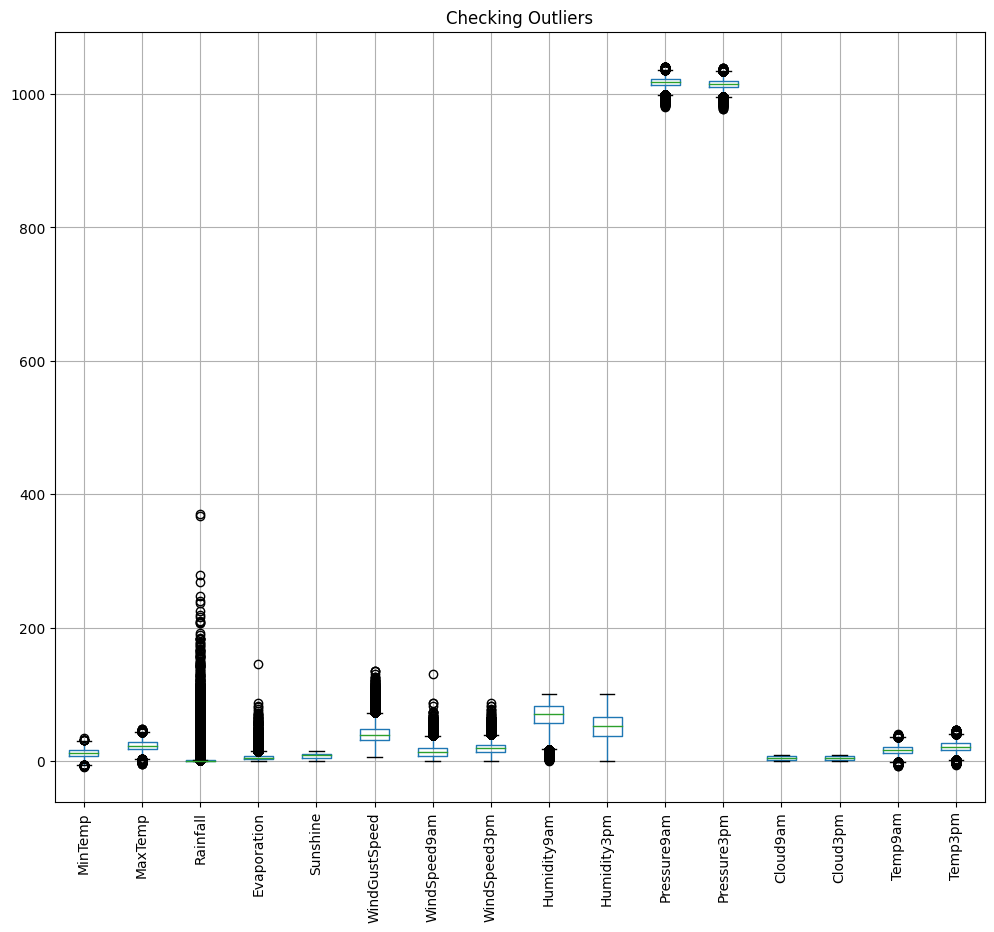

In [25]:
# we can not directly impute missing values by using mean becuase there could be a chance of outliers in the data
# lets check by box plot
plt.figure(figsize=(12,10))
data.boxplot(num_col_with_null_values,rot = 90)
plt.title("Checking Outliers")

In [26]:
# we can see that there are many outliers in specially Rainfall and other featrures
# lets handle this

In [27]:
# Remove Outliers from Numerical Features

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  data.loc[data[feature]<lower_limit, feature] = lower_limit
  data.loc[data[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data

Text(0.5, 1.0, 'Removed Outliers')

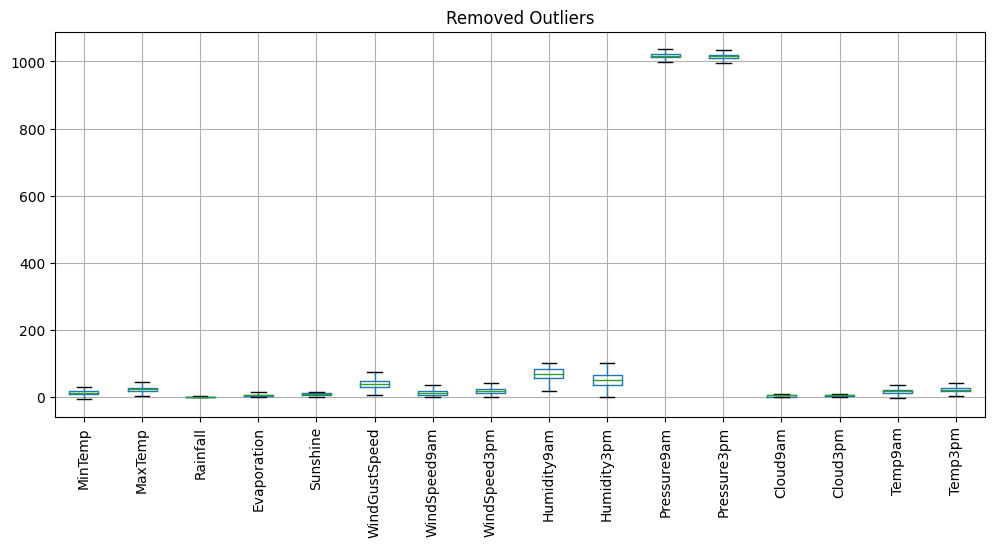

In [28]:
plt.figure(figsize=(12,5))
data.boxplot(num_col_with_null_values,rot = 90)    # we can see there is no outliers now
plt.title("Removed Outliers")

In [29]:
for features in num_col_with_null_values:
  data[features] = data[features].fillna(data[features].mean())   # all missing values imputed by mean

In [30]:
data[num_col_with_null_values].isnull().sum()  # we can see there is no null values now

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# EDA

In [31]:
# Exploring Numerical Variables

df_num = data.select_dtypes(include = ['float64'])
df_num.head()
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

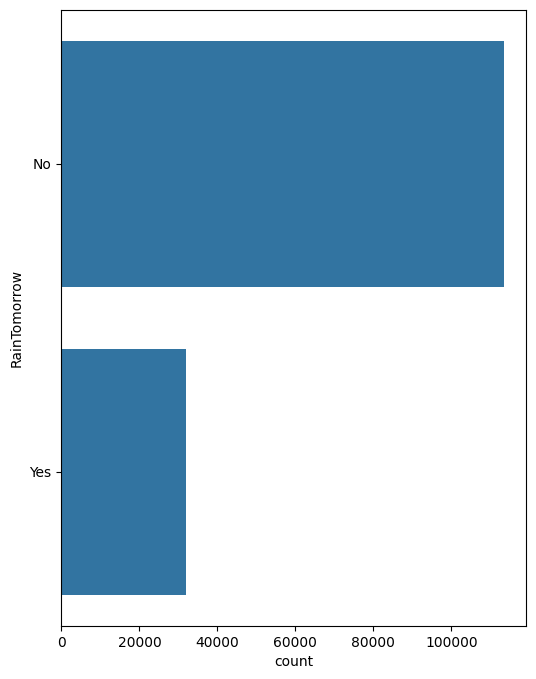

(145460, 6)

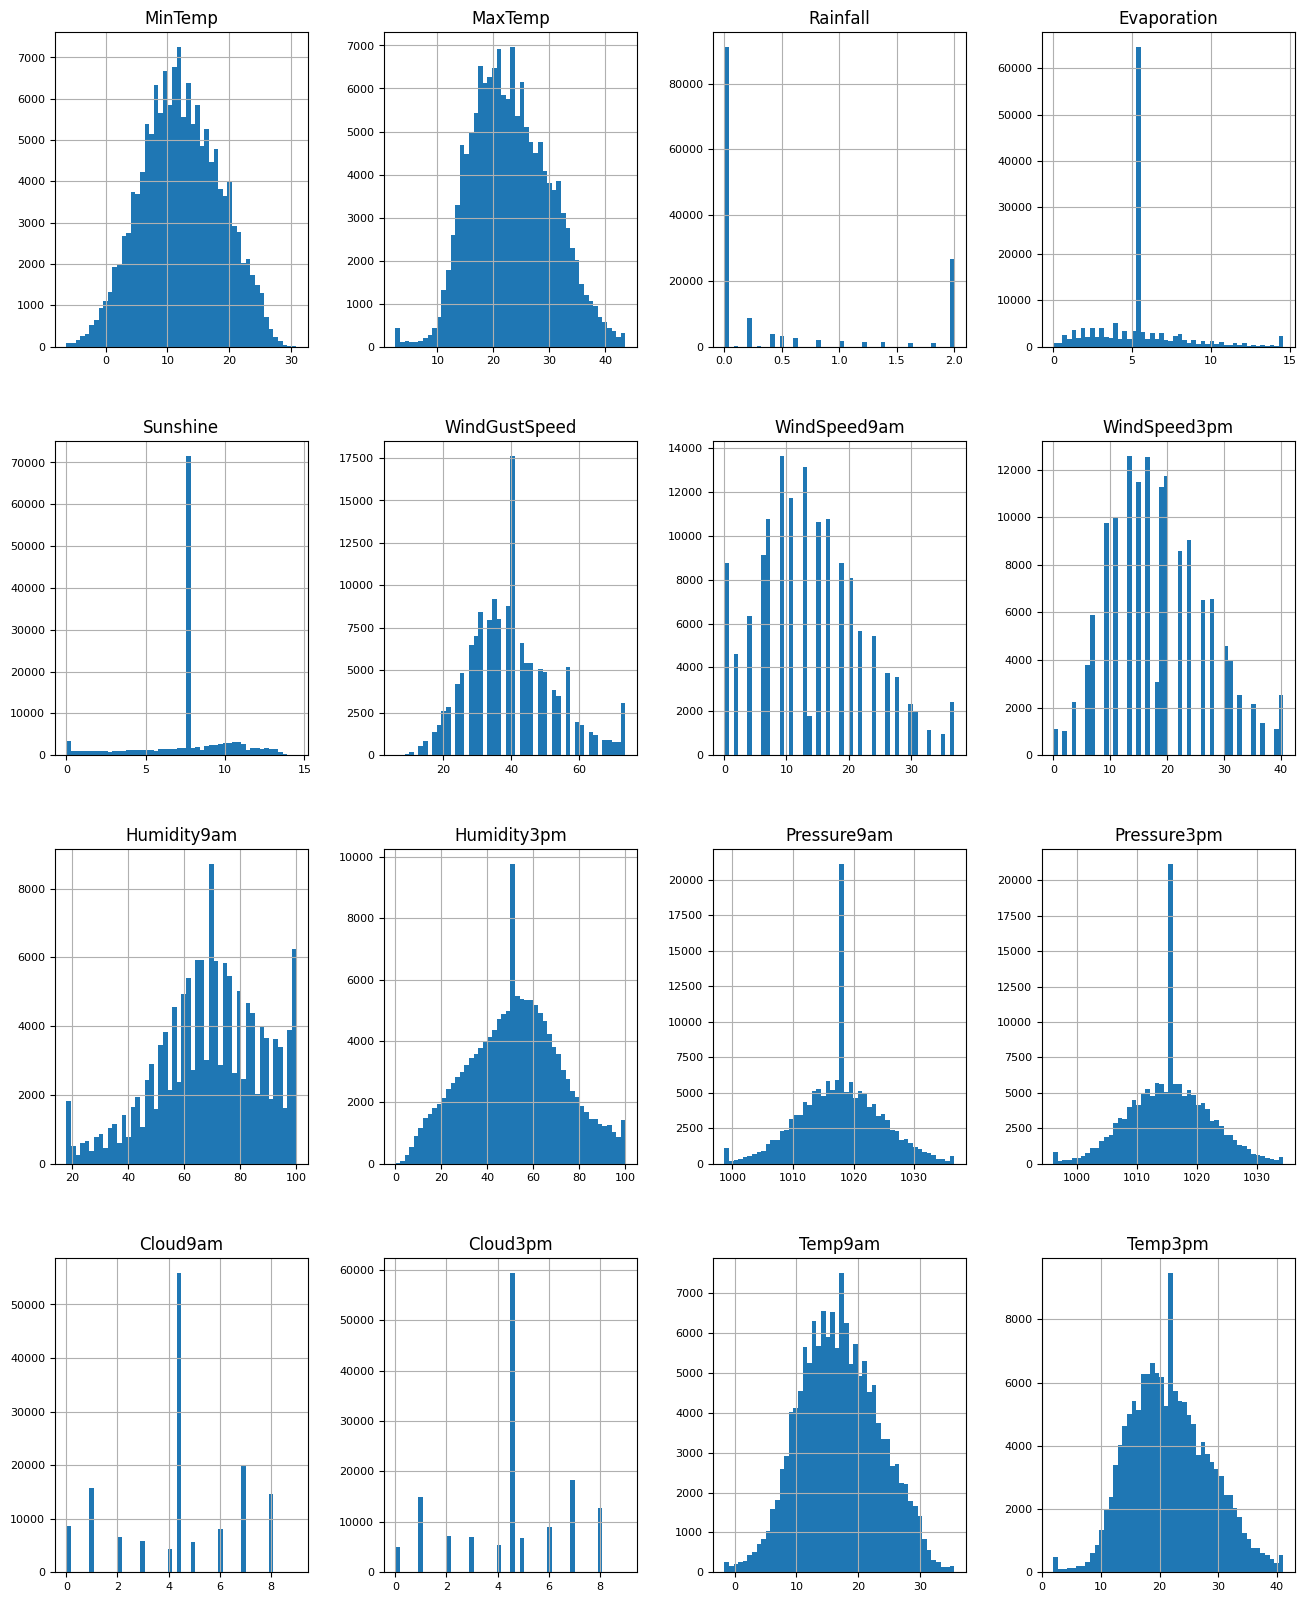

In [32]:
df_num.shape

data['RainTomorrow'].unique()

#View the Frequency Distribution
data['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=data)
plt.show()

# Histogram for NumericVariablesal

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Exploring Categorical Variables

df_cat = data.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

## Bivariate Analysis

Text(0.5, 1.0, 'Rainfall vs Sunshine')

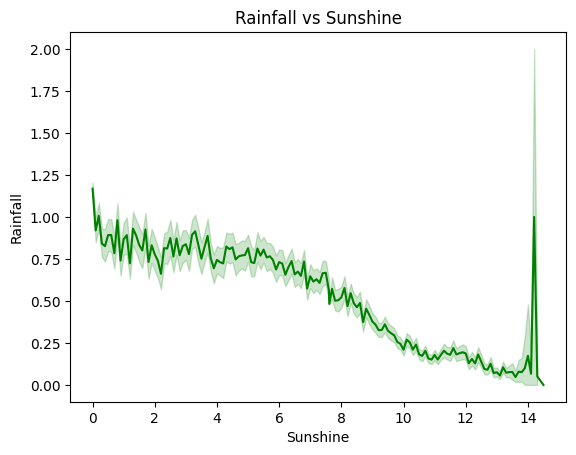

In [33]:
sns.lineplot(data= data,x="Sunshine",y="Rainfall",color = "green")
plt.title('Rainfall vs Sunshine')
# we can see sunshine is inversely proportional to the Rainfall

Text(0.5, 1.0, 'Evaporation vs Sunshine')

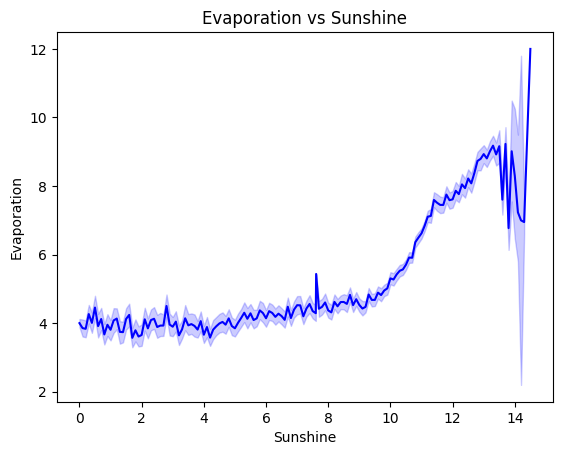

In [34]:
sns.lineplot(data= data,x="Sunshine",y="Evaporation",color = "blue")
plt.title('Evaporation vs Sunshine')
# we can see sunshine is directly proportional to the Rainfall

# Numerical Encoding

In [35]:
data.isnull().sum() # as there is no null values now
# and for Machine learning we know machine understand only numerical data so we need to convert
# categorical features into Dummy variables or need to do encoding

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [36]:
cat_fea = [i for i in data.columns if data[i].dtype == "O"]
cat_fea   # Finding final categorical features that is need to be turned into Numericals Encoding means numerical values

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [37]:
# here we are defining a function
def encode_cat(feature):   # function will take feature
  mapping_dic = {}         # empty dic
  unique_val = list(data[feature].unique())    # extract particular feature from data and convert into list
  for idx in range(len(unique_val)):      #loop will run till the len of list
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list
  return mapping_dic       # return the feature


In [38]:
for i in cat_fea:   # we have the list of categorical features
  data[i].replace(encode_cat(i), inplace = True)
  print(data.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0         0     13.4     22.9       0.6     5.318667  7.611178           W   
1         0      7.4     25.1       0.0     5.318667  7.611178         WNW   
2         0     12.9     25.7       0.0     5.318667  7.611178         WSW   
3         0      9.2     28.0       0.0     5.318667  7.611178          NE   
4         0     17.5     32.3       1.0     5.318667  7.611178           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000   4.50993   
1           44.0        NNW        WSW  ...       1007.8  4.447461   4.50993   
2           46.0          W        WSW  ...       1008.7  4.447461   2.00000   
3           24.0         SE          E  ...       1012.8  4.447461   4.50993   
4           41.0        ENE         NW  ...       1006.0  7.000000   8.00000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year

In [39]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


# We have done
* we have converted all categorical data into numerical values
* first we separtated it and then we converted into numerical

In [40]:
data["RainTomorrow"].unique()

array([0, 1])

# Correlation

<Axes: >

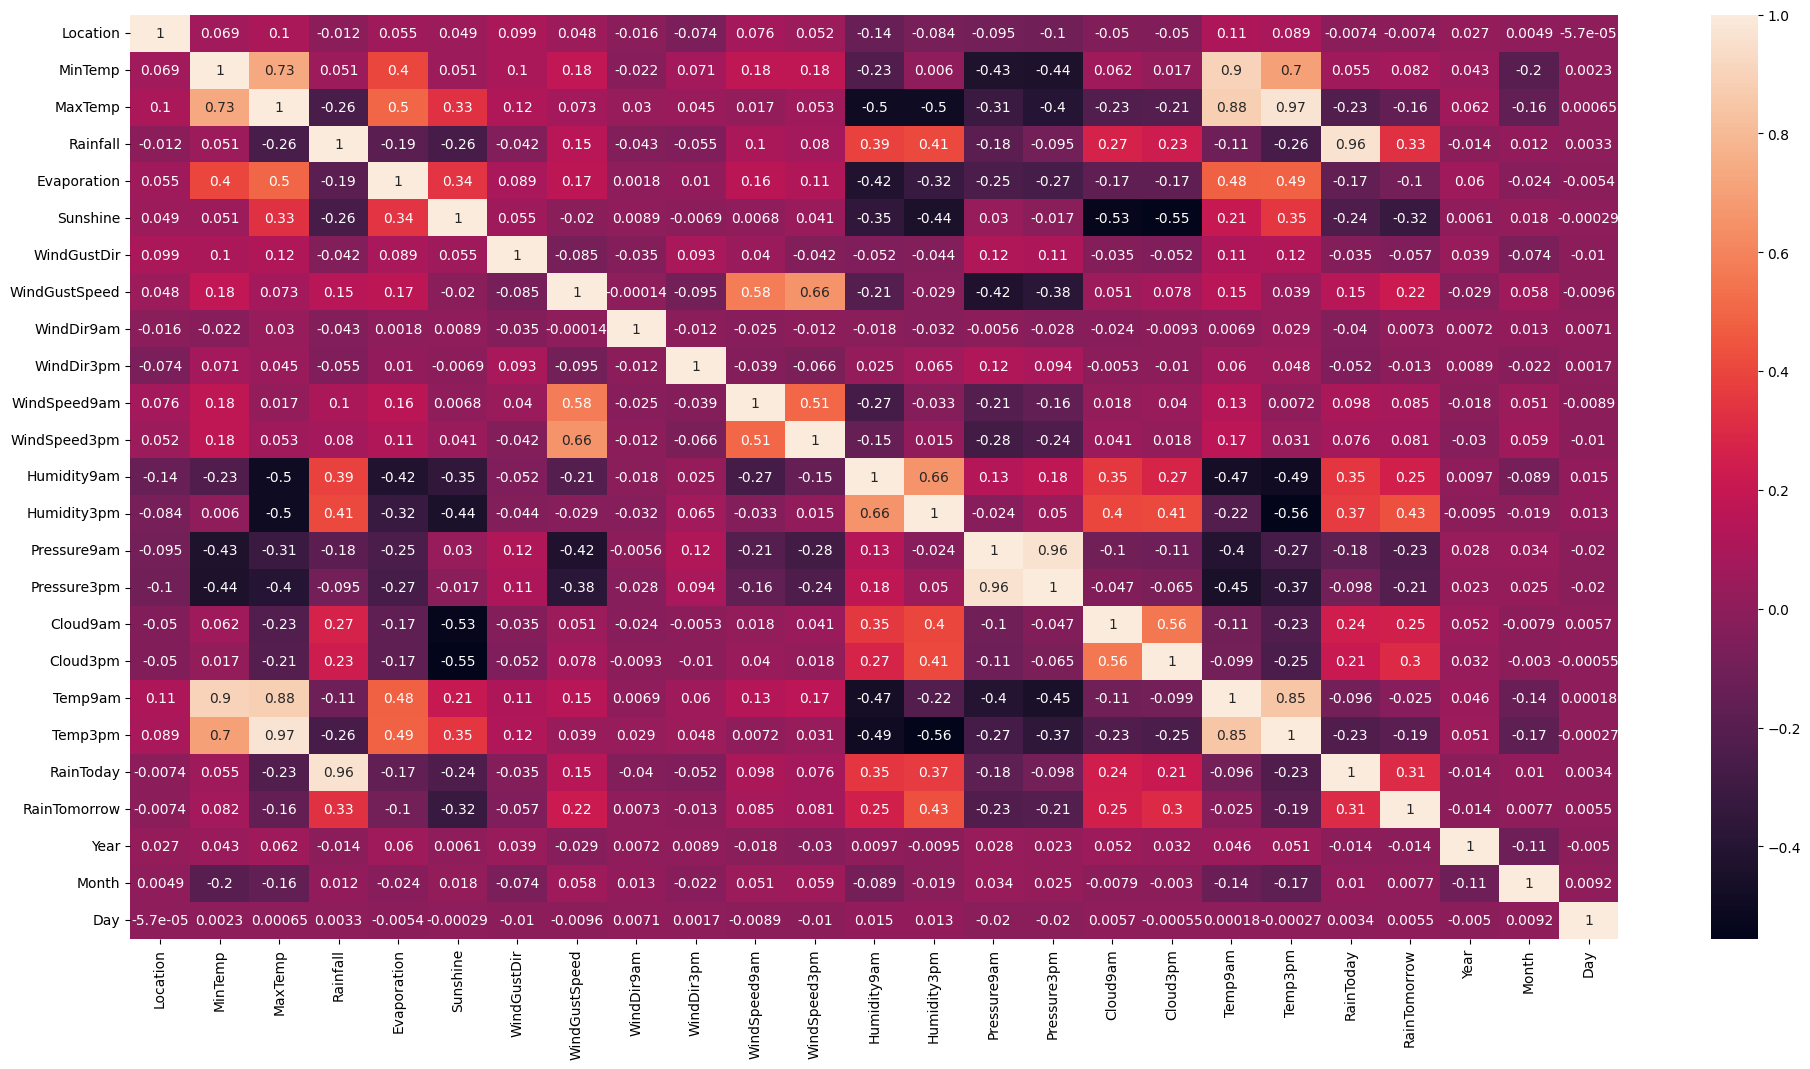

In [41]:
plt.figure(figsize =(24,12))
sns.heatmap(data.corr(), annot = True)

# Spliting data

In [42]:
y = data["RainTomorrow"]  # dependent or target
x = data.drop(["RainTomorrow"],axis = 1)  # indepedent or input

# Over Sampling

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

print(x.shape,y.shape)

(227166, 24) (227166,)


# Feature Estimation


* we can also use weight of evidence
* but here we will use  ExtraTreesRegressor

In [45]:
# we will use ExtraTreesRegressor for getting the weight of evidence
from sklearn.ensemble import ExtraTreesRegressor
feat_sel_model = ExtraTreesRegressor()
feat_sel_model.fit(x,y)
features_imp = feat_sel_model.feature_importances_
features_imp

array([0.02804068, 0.02091761, 0.02032702, 0.17899513, 0.01825998,
       0.04658945, 0.02468863, 0.05002901, 0.02139981, 0.02354584,
       0.02292487, 0.02347648, 0.03048569, 0.18237029, 0.02907434,
       0.04404377, 0.03389815, 0.07518774, 0.01964538, 0.0203032 ,
       0.01440765, 0.02279764, 0.02485235, 0.02373928])

<Axes: >

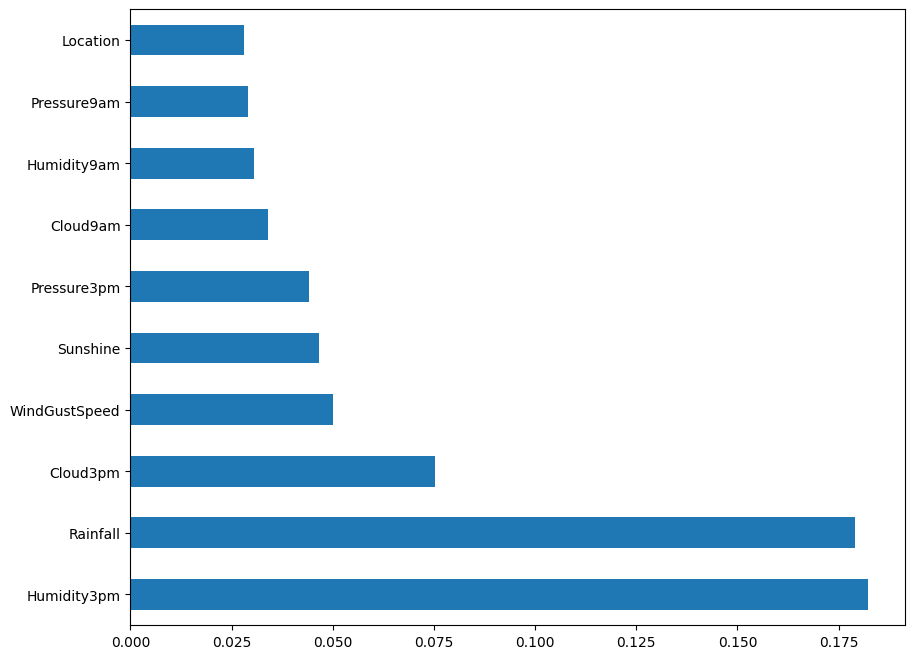

In [46]:
features_imp_val = pd.Series(features_imp, index = x.columns)
plt.figure(figsize=(10,8))
features_imp_val.nlargest(10).plot(kind = "barh")

# Spliting data into training and testing

In [47]:
from sklearn.model_selection import train_test_split   # testing and splitting
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [48]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 181732
Length of Testing Data: 45434


# Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [50]:
x_test = scaler.transform(x_test)

# Model Building

## Different Algos

In [59]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)

    print('model name ',model)
    print('accuracy ',accuracy)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

model name  LogisticRegression()
accuracy  0.7908614693841617
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.7932385438218075
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.9044328036272395
model name  KNeighborsClassifier()
accuracy  0.8567372452348462


# Using XGboost

In [61]:
import xgboost as xgb

xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=0.9, colsample_bytree=0.5, gamma=0,
              grow_policy='lossguide', learning_rate=0.4, max_bin=512,
              max_delta_step=0, max_depth=8, min_child_weight=0.8, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=9,
              objective='binary:hinge', random_state=0, reg_alpha=2,
              reg_lambda=3, sampling_method='uniform', scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, tree_method='hist',
              verbosity=1)

xgb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:39:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=512,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=8, max_leaves=None, min_child_weight=0.8, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=9, ...)

In [62]:
x_test = np.nan_to_num(x_test, nan=0)

# Finalizing Algorithm

* we will use Random Forest Classifier as it gives 90% Accuracy for our forecasting of tomorrow rain

## Random Forest Classifier

## Model initilization

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_samples=0.9)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9)

## Model Fitting

In [64]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

## Model Testing

In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.9039485847603117


## Model Accuarcy

In [66]:
print("Train Data Score: {}".format(classifier.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier.score(x_test, y_test)))

Train Data Score: 0.9999779895670547
Test Data Score: 0.9039485847603117


## Model Score

In [67]:
print("Train Data Score: {}".format(classifier.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier.score(x_test, y_test)))

Train Data Score: 0.9999779895670547
Test Data Score: 0.9039485847603117


## Confusion Matrix

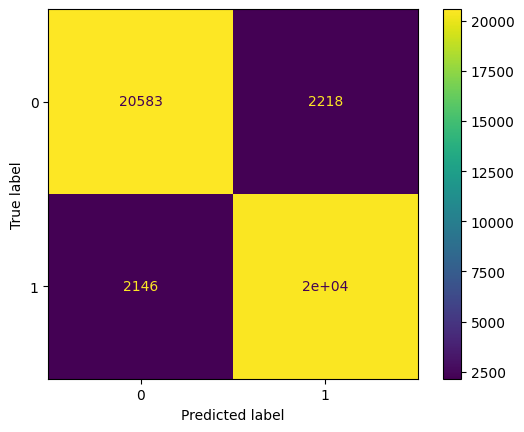

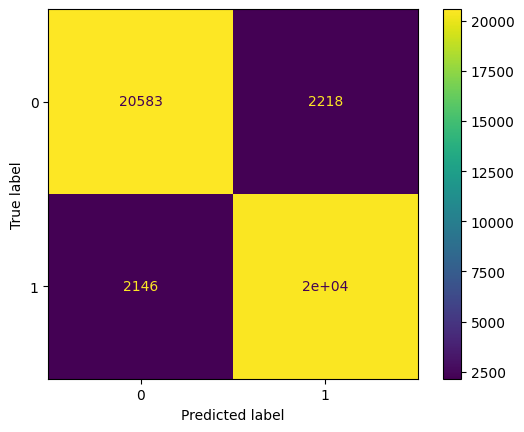

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm.plot()


## ROC Curve

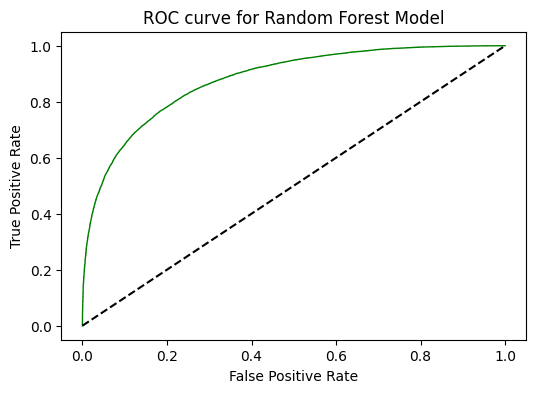

In [69]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random Forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

# Using Model for deployment or in production phase

* We can use it now for production phase
* it could be deployed on heruko or streamlit
* we can develope web app on it
* now we are dumbing our solution

In [70]:
import pickle
pickle.dump(rf, open('iri.pkl', 'wb'))
loaded_model = pickle.load(open("iri.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9037284852753444
